In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [4]:
# Set the style of seaborn
sns.set(style="whitegrid")
%matplotlib inline 

In [5]:

data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Remove duplicate rows
duplicates = data.duplicated().sum()
if duplicates > 0:
    print("Duplicate rows found:")
    print(data[data.duplicated()])

data.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

Duplicate rows found:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2

In [7]:
# Dataset info and statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Check for null values
nulls = data.isnull().sum()
print("\nMissing values in each column:")
print(nulls)

data.sample(10)


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
62,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
184,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
611,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
32,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
196,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
599,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
384,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0


# Feature explanations

In [9]:
'''
cp --> chest pain type  --   restecg --> resting blood pressure 
col --> Cholesterol
fbs --> fasting blood sugar
restecg --> Resting ECG result
thalach --> max heart rate achieved
exang --> (exercise-induced angina)	
oldpeak --> Having arterial problems (ST)
slope --> ST slope 
ca --> The number of major vessels visible on the x-ray
thal --> نتيجة فحص الثاليوم	
target --> 1 = مريض، 0 = سليم
'''

'\ncp --> chest pain type  --   restecg --> resting blood pressure \ncol --> Cholesterol\nfbs --> fasting blood sugar\nrestecg --> Resting ECG result\nthalach --> max heart rate achieved\nexang --> (exercise-induced angina)\t\noldpeak --> Having arterial problems (ST)\nslope --> ST slope \nca --> The number of major vessels visible on the x-ray\nthal --> نتيجة فحص الثاليوم\t\ntarget --> 1 = مريض، 0 = سليم\n'

In [10]:
# Correlation matrix visualization
fig = px.imshow(data.corr(), text_auto=True, color_continuous_scale='RdBu', title='Correlation Matrix')
fig.show()



Gender Distribution:
sex
1    206
0     96
Name: count, dtype: int64


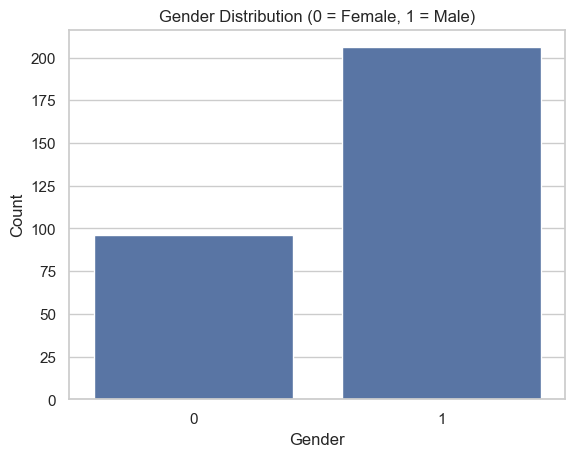

In [11]:
# Gender Distribution (male n female)
print("\nGender Distribution:")
print(data['sex'].value_counts())
sns.countplot(x='sex', data=data)
plt.title('Gender Distribution (0 = Female, 1 = Male)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Gender Distribution by Heart Disease:


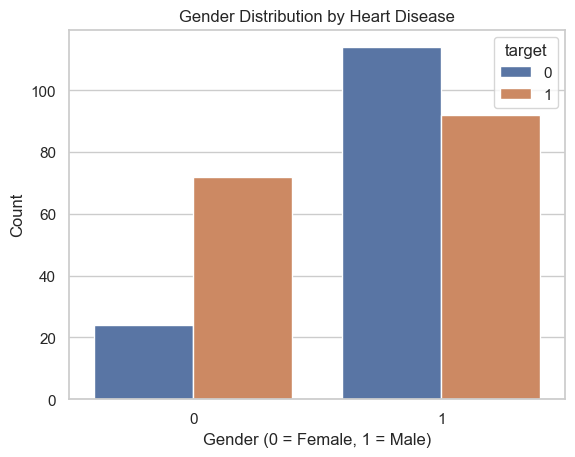

In [12]:
# Gender Distribution by Heart Disease
print("\nGender Distribution by Heart Disease:")
sns.countplot(x='sex', hue='target', data=data)
plt.title('Gender Distribution by Heart Disease')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

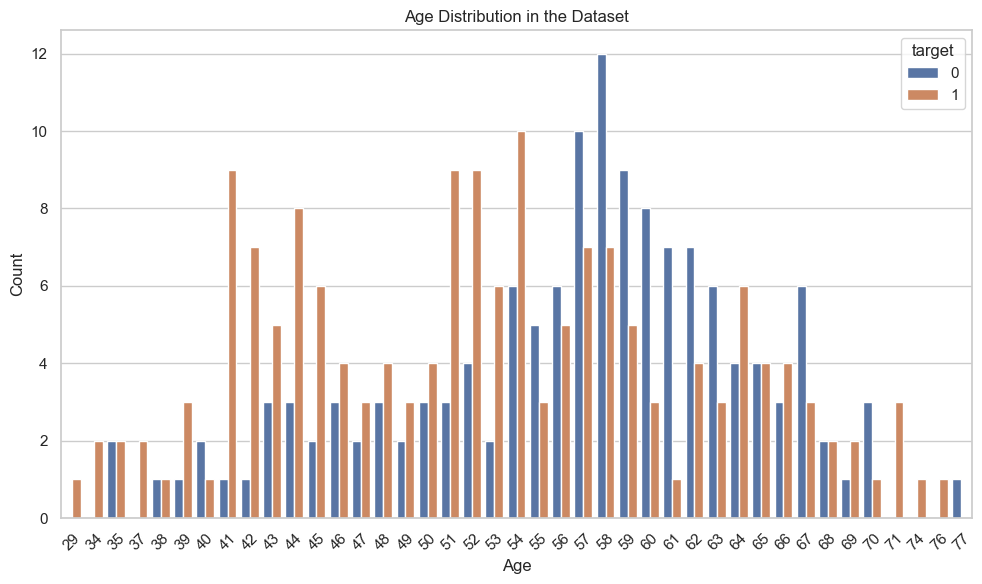

In [13]:
# Age Distribution by Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='target', data=data)
plt.title('Age Distribution in the Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

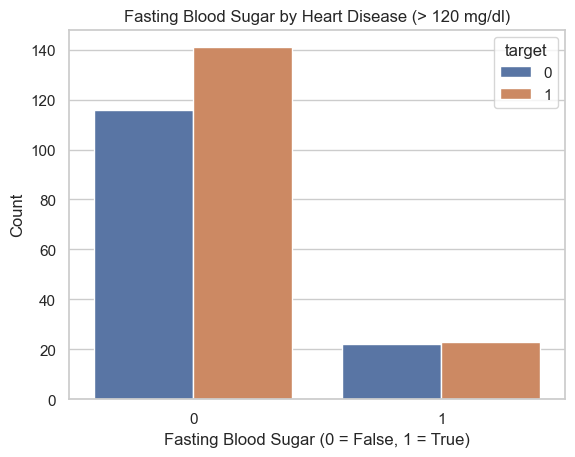

In [14]:
# Fasting Blood Sugar by Heart Disease
sns.countplot(x='fbs', hue='target', data=data)
plt.title('Fasting Blood Sugar by Heart Disease (> 120 mg/dl)')
plt.xlabel('Fasting Blood Sugar (0 = False, 1 = True)')
plt.ylabel('Count')
plt.show()

In [15]:
# Sample after visuals
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
91,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
170,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
643,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
39,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
530,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
168,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
59,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
124,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
599,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1


C:\Users\Ayman\AppData\Local\Temp\ipykernel_22740\420495384.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




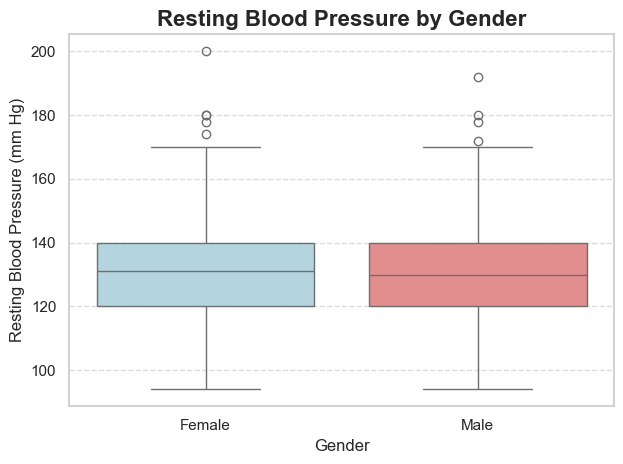

In [16]:
# Resting Blood Pressure by Gender
sns.boxplot(x='sex', y='trestbps', data=data, palette=['lightblue', 'lightcoral'])
plt.title('Resting Blood Pressure by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Resting Blood Pressure (mm Hg)', fontsize=12)
plt.xticks([0, 1], ['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

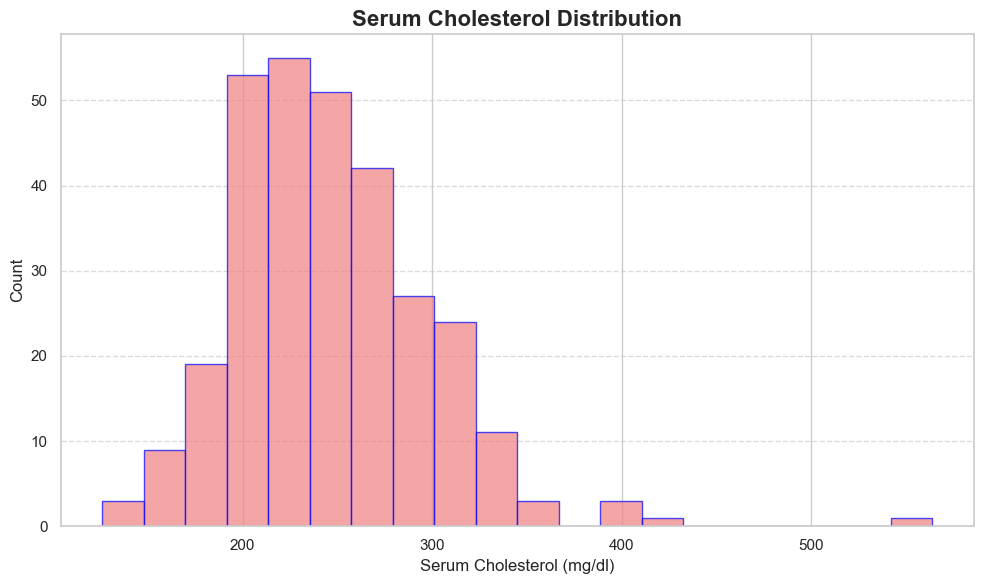

In [17]:
# Serum Cholesterol Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['chol'], bins=20, color='lightcoral', edgecolor='blue', alpha=0.7)
plt.title('Serum Cholesterol Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Serum Cholesterol (mg/dl)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

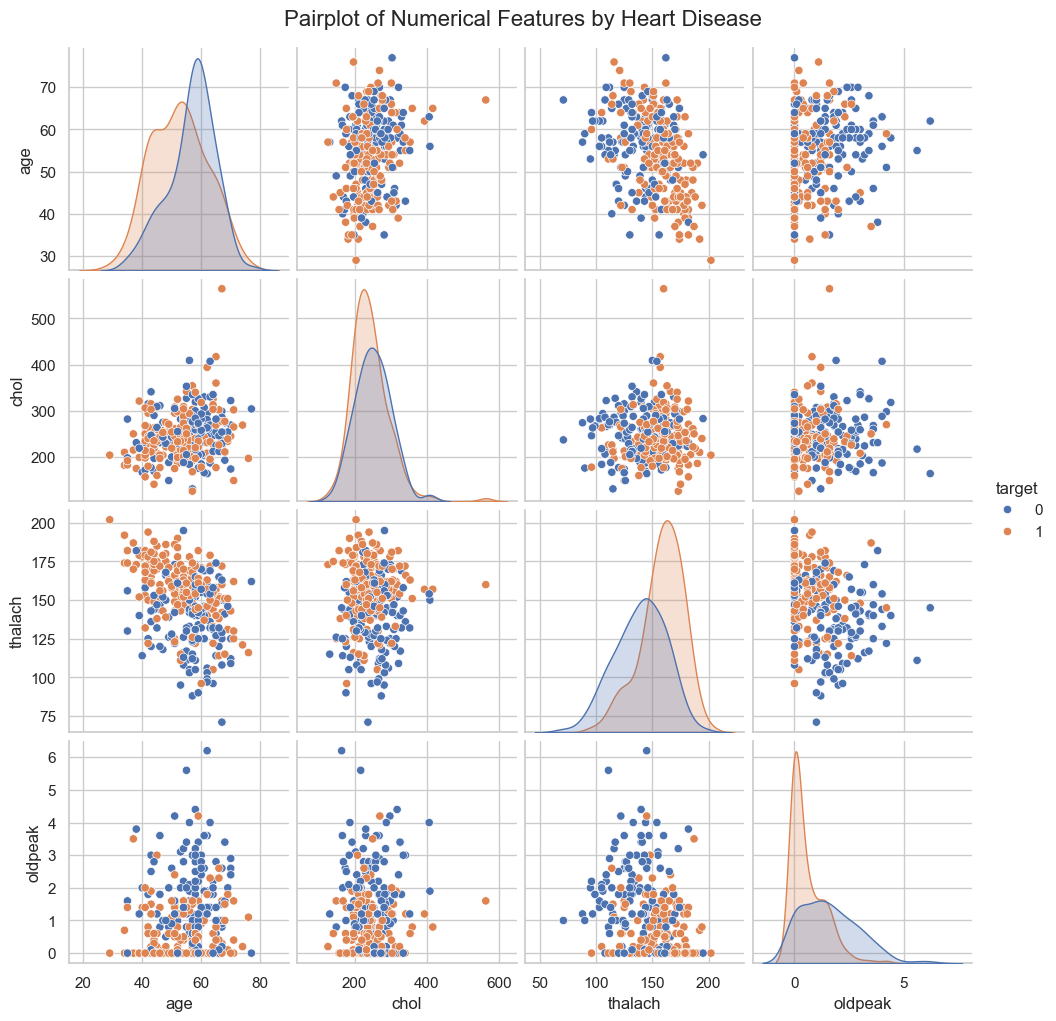

In [18]:
# Pairplot to show relationship between numerical features and target
sns.pairplot(data, hue='target', vars=['age', 'chol', 'thalach', 'oldpeak'])
plt.suptitle('Pairplot of Numerical Features by Heart Disease', y=1.02, fontsize=16) # y means the distance from the top of the plot
plt.show()


C:\Users\Ayman\AppData\Local\Temp\ipykernel_22740\3298832027.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




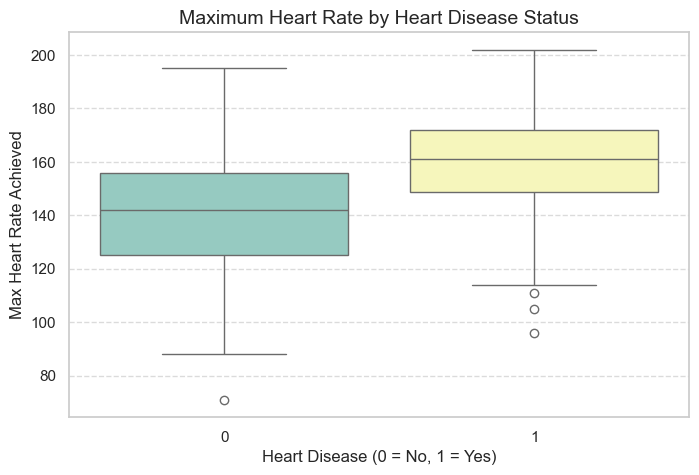

In [19]:
# Boxplot for max heart rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='thalach', data=data, palette='Set3')
plt.title('Maximum Heart Rate by Heart Disease Status', fontsize=14)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate Achieved')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

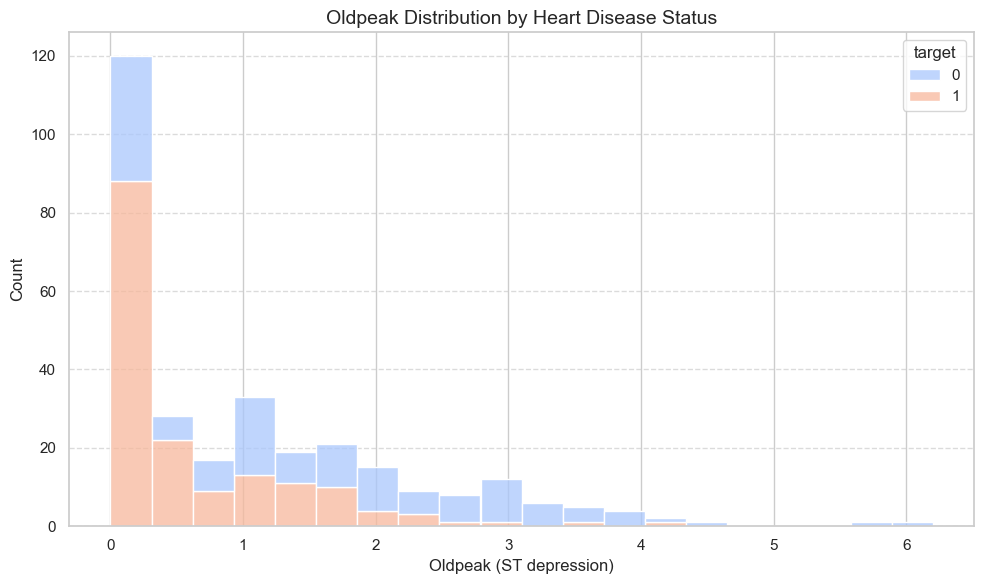

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='oldpeak', hue='target', multiple='stack', bins=20, palette='coolwarm') # multiple='stack' means the bars are stacked on top of each other
plt.title('Oldpeak Distribution by Heart Disease Status', fontsize=14)
plt.xlabel('Oldpeak (ST depression)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()